In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting no limit for the max columns to display, for easier investigation 
pd.options.display.max_columns = None

df = pd.read_csv('Complete_Dataset_updated.csv')
df.head()

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index
0,7/6/2022,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,44744,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516
1,7/6/2022,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,44744,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516
2,7/6/2022,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,44744,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646
3,7/6/2022,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,44744,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646
4,7/6/2022,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,44744,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

# the dates are in Excel date format, so we need to turn into datetime objects
df['Satellite_Images_Dates'] = pd.to_datetime(df['Satellite_Images_Dates'], origin='1899-12-30', unit='D')

df['Satellite_Images_Dates'] = df['Satellite_Images_Dates'].dt.strftime('%Y-%m-%d')
df[['Date', 'Satellite_Images_Dates']]

,Date,Satellite_Images_Dates
0,2022-07-06,2022-07-02
1,2022-07-06,2022-07-02
2,2022-07-06,2022-07-02
3,2022-07-06,2022-07-02
4,2022-07-06,2022-07-02
...,...,...
307,2023-03-01,2023-02-27
308,2023-03-01,2023-02-27
309,2023-03-01,2023-02-27
310,2023-03-01,2023-02-27


#### Handling Datetimes into day, month, year columns

In [5]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# columns for the date of the satellite images
df['sat_day'] = df['Satellite_Images_Dates'].str.split('-').str[2].astype(int)
df['sat_month'] = df['Satellite_Images_Dates'].str.split('-').str[1].astype(int)
df['sat_year'] = df['Satellite_Images_Dates'].str.split('-').str[0].astype(int)

df

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index,day,month,year,sat_day,sat_month,sat_year
0,2022-07-06,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516,6,7,2022,2,7,2022
1,2022-07-06,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516,6,7,2022,2,7,2022
2,2022-07-06,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646,6,7,2022,2,7,2022
3,2022-07-06,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646,6,7,2022,2,7,2022
4,2022-07-06,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,2022-07-02,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806,6,7,2022,2,7,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2023-03-01,60,154,2,-20.446365,-54.838516,Q4,1,31.915926,10.798575,2261.000000,48.798779,40.637087,7.922138,57.243710,63.436029,2023-02-27,1255,1383,1713,1604,2324,3746,4047,3808,4161,4109,3017,2144,0.407243,0.159376,0.312047,1.010986,2204,1.223001,-4854961.418,0.610808,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,5.312839,1,3,2023,27,2,2023
308,2023-03-01,60,155,1,-20.446937,-54.839311,S1,0,45.505167,8.263333,15634.666670,59.758212,44.775544,7.958124,54.019852,58.864850,2023-02-27,1303,1328,1673,1468,2139,3779,4215,3907,4504,4169,2982,2047,0.453767,0.203313,0.349824,1.147663,2439,1.335326,-5945726.831,0.680588,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,4.237497,1,3,2023,27,2,2023
309,2023-03-01,60,155,2,-20.446937,-54.839311,S1,0,45.493257,8.218142,15634.666670,60.697330,45.194175,8.190470,53.693738,58.473144,2023-02-27,1303,1328,1673,1468,2139,3779,4215,3907,4504,4169,2982,2047,0.453767,0.203313,0.349824,1.147663,2439,1.335326,-5945726.831,0.680588,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.9811

#### Performing OneHotEncoding for sample types

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

one_hot_array = encoder.fit_transform(df[['Sample_type']]).toarray()

one_hot_types_df = pd.DataFrame(one_hot_array, columns=encoder.get_feature_names_out())
# one_hot_types_df

# adding the one-hot encoded columns to the original dataframe (without the original sample type column)
df_encoded = pd.concat([df.drop('Sample_type', axis=1), one_hot_types_df], axis=1)
df_encoded

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index,day,month,year,sat_day,sat_month,sat_year,Sample_type_G1,Sample_type_G2,Sample_type_G3,Sample_type_G4,Sample_type_Q1,Sample_type_Q2,Sample_type_Q3,Sample_type_Q4,Sample_type_S1,Sample_type_S2
0,2022-07-06,187,1,1,-20.446717,-54.839505,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2022-07-06,187,1,2,-20.446717,-54.839505,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-06,187,2,1,-20.446996,-54.838856,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022-07-06,187,2,2,-20.446996,-54.838856,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-07-06,187,3,1,-20.446424,-54.839246,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,2022-07-02,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806,6,7,2022,2,7,2022,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2023-03-01,60,154,2,-20.446365,-54.838516,1,31.915926,10.798575,2261.000000,48.798779,40.637087,7.922138,57.243710,63.436029,2023-02-27,1255,1383,1713,1604,2324,3746,4047,3808,4161,4109,3017,2144,0.407243,0.159376,0.312047,1.010986,2204,1.223001,-4854961.418,0.610808,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,5.312839,1,3,2023,27,2,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
308,2023-03-01,60,155,1,-20.446937,-54.839311,0,45.505167,8.263333,15634.666670,59.758212,44.775544,7.958124,54.019852,58.864850,2023-02-27,1303,1328,1673,1468,2139,3779,4215,3907,4504,4169,2982,2047,0.453767,0.203313,0.349824,1.147663,2439,1.335326,-5945726.831,0.680588,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,59

# Predictive Analytics

In [ ]:
X = df_encoded.drop(['Biomass', 'Date', 'Satellite_Images_Dates'], axis=1)
y = df_encoded['Biomass']

### Feature Selection

#### 1. First Technique (Lasso)

In [ ]:
from sklearn.linear_model import LassoCV

# Perform cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=list(np.logspace(-4, 4, 100)), cv=5, random_state=42)
lasso_cv.fit(X, y)

# Best alpha
best_alpha = lasso_cv.alpha_
lasso_coef = lasso_cv.coef_

c:\Users\Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369794.0318393707, tolerance: 245134.94007747027
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9459620.946982622, tolerance: 245134.94007747027
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14416615.131522775, tolerance: 245134.94007747027
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\

In [24]:
print(f"Best alpha: {best_alpha}")

Best alpha: 31.257158496882415


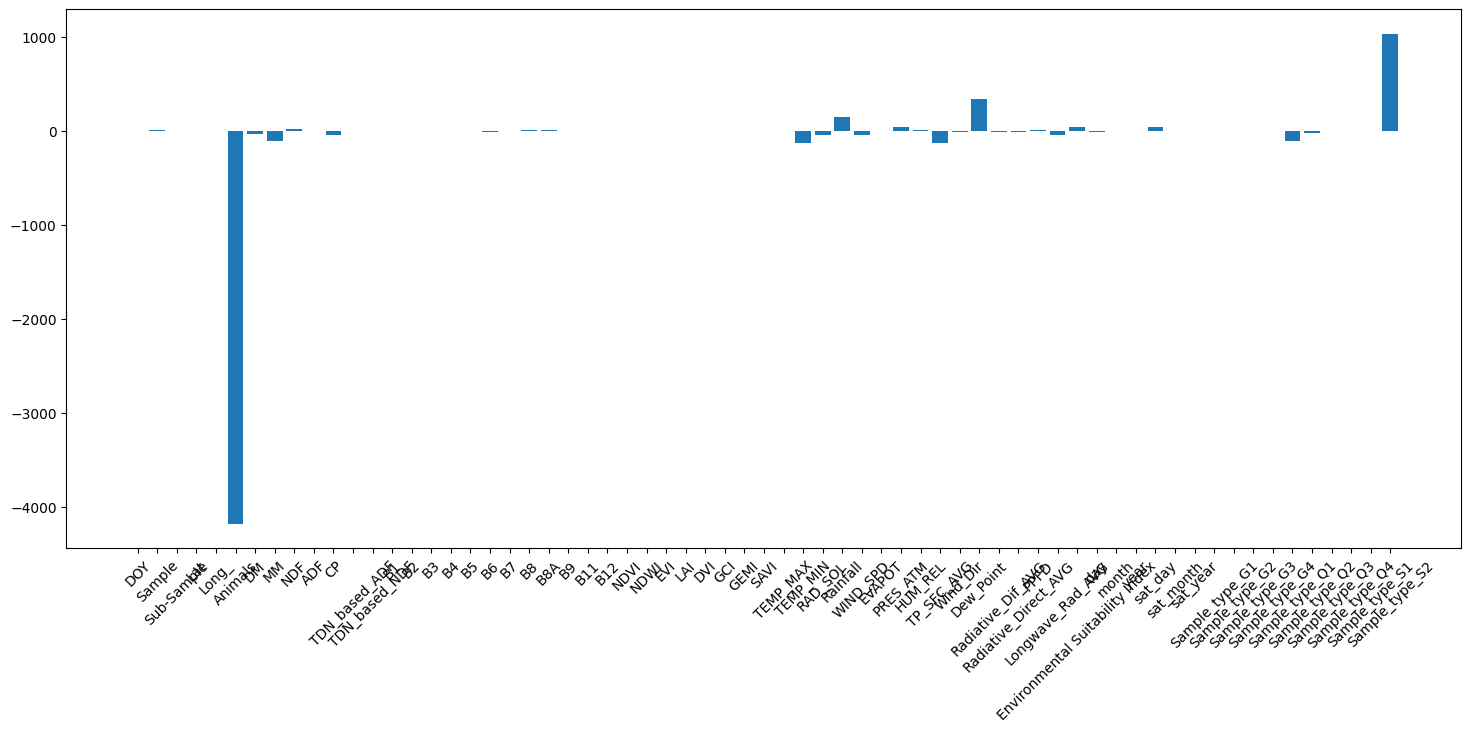

In [26]:
col_names = X.columns
plt.figure(figsize=(18, 7))
plt.bar(col_names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [40]:
# making the plot more readable by removing the features with less than 10 coefficients
simplified_features = col_names[lasso_coef > 10] # 10 was chosed because observed coefficients less than 10 are not significant
simplified_lasso_coef = lasso_coef[lasso_coef > 10]
simplified_features

Index(['NDF', 'Rainfall', 'PRES_ATM', 'Dew_Point', 'PPFD',
       'Environmental Suitability Index', 'sat_day', 'Sample_type_S2'],
      dtype='object')

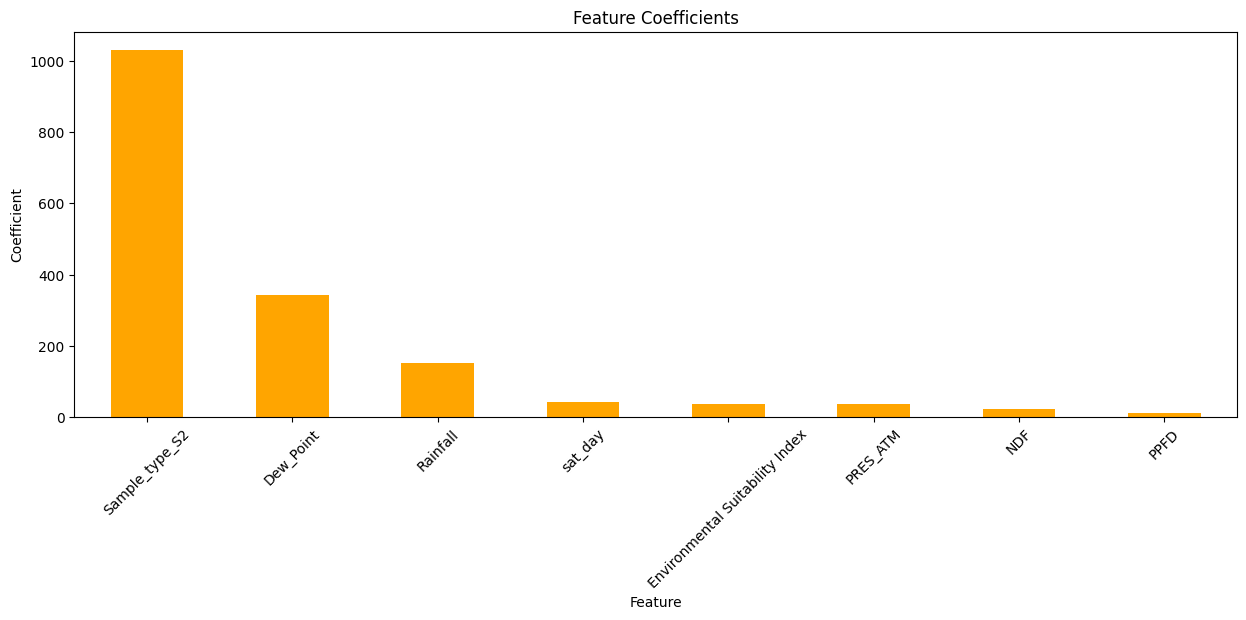

In [41]:
feature_coef_df = pd.DataFrame({'feature': simplified_features, 'coefficient': simplified_lasso_coef})

sorted_feature_coef_df = feature_coef_df.sort_values(by='coefficient', ascending=False)
sorted_feature_coef_df.plot(kind='bar', x='feature', y='coefficient', figsize=(15, 5), color='orange', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.title('Feature Coefficients')
plt.show()

In [39]:
lasso_selected_features = feature_coef_df['feature'].to_list()
lasso_selected_features_df = df_encoded[lasso_selected_features]
lasso_selected_features_df

,NDF,Rainfall,PRES_ATM,Dew_Point,PPFD,Environmental Suitability Index,sat_day,Sample_type_S2
0,79.722130,0.0,1014.941667,8.584028,358.837504,3.209516,2,0.0
1,70.663844,0.0,1014.941667,8.584028,358.837504,5.109516,2,0.0
2,79.330072,0.0,1014.941667,8.584028,358.837504,3.506646,2,0.0
3,73.021953,0.0,1014.941667,8.584028,358.837504,4.606646,2,0.0
4,74.705529,0.0,1014.941667,8.584028,358.837504,3.703806,2,0.0
...,...,...,...,...,...,...,...,...
307,48.798779,2.5,1015.800000,12.442361,593.233703,5.312839,27,0.0
308,59.758212,2.5,1015.800000,12.442361,593.233703,4.237497,27,0.0
309,60.697330,2.5,1015.800000,12.442361,593.233703,5.537497,27,0.0
310,76.160698,2.5,1015.800000,12.442361,593.233703,4.834511,27,1.0


In [42]:
lasso_selected_features_df['Sample_type_S2'].var()

np.float64(0.11686866188473909)

**quick note**: altough Sample_type_S2 has a very low varience, i decided to keep it to study the performance of the model when trained on this select dataset

#### 2. Second Technique (SelectFromModel)

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

sfm = SelectFromModel(model)
sfm.fit(X_train, y_train)

selected_features = X.columns[sfm.get_support()]
df[selected_features]


,NDF,ADF,TDN_based_ADF,TDN_based_NDF,NDVI,EVI,LAI,SAVI
0,79.722130,52.504546,47.998959,50.537899,0.223616,0.160974,0.464404,0.335391
1,70.663844,46.794328,52.447219,54.316111,0.223616,0.160974,0.464404,0.335391
2,79.330072,50.323829,49.697737,50.701427,0.218199,0.156601,0.448582,0.327267
3,73.021953,49.138437,50.621158,53.332543,0.218199,0.156601,0.448582,0.327267
4,74.705529,53.632386,47.120371,52.630324,0.212842,0.150619,0.426941,0.319231
...,...,...,...,...,...,...,...,...
307,48.798779,40.637087,57.243710,63.436029,0.407243,0.312047,1.010986,0.610808
308,59.758212,44.775544,54.019852,58.864850,0.453767,0.349824,1.147663,0.680588
309,60.697330,45.194175,53.693738,58.473144,0.453767,0.349824,1.147663,0.680588
310,76.160698,46.191561,52.916774,52.023373,0.448134,0.343437,1.124554,0.672137


#### It is clear that the two feature selection techniques resulted in different selected features, this is interesting because we can test them and see which gives the best results.

### Models Comparison

#### Training LinearRegression model on the selected features from Lasso

#### Training LinearRegression model on the selected features from SelectFromModel

In [8]:
# Mean Absolute Error (MAE)

# R-squared (R²)

Analyze which model provides the most accurate and reliable predictions for biomass production

### Visiualizing Predicitve Analysis